In [1]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("spam.csv", encoding="latin-1")

In [4]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


## DATA CLEANING

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
# As there are NaN values in the dataset, we will drop those columns
df = df.drop(columns=["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"])
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
# Cross-Checking for NaN values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [8]:
df.rename(columns={'v1': 'target', 'v2': 'text'}, inplace=True)

In [9]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
# Encoding the Target feature.

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [12]:
df["target"] = encoder.fit_transform(df["target"])

In [13]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
# Check for the Null values
df.isnull().sum()

target    0
text      0
dtype: int64

In [15]:
# Check for Duplicate values
df.duplicated().sum()

np.int64(403)

In [16]:
# There are '403' duplicate values, so now we have to remove those values
# Remove the Duplicate values

df = df.drop_duplicates(keep="first")
df.duplicated().sum()

np.int64(0)

In [18]:
df.shape

(5169, 2)

## Perform EDA

In [19]:
# Get the number of SPAM and NOT-SPAM
df["target"].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

In [21]:
import matplotlib.pyplot as plt

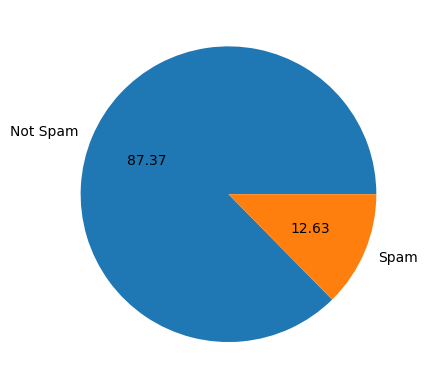

In [ ]:
plt.pie(df["target"].value_counts(), labels=["Not Spam", "Spam"], autopct="%0.2f")
plt.show()

# Data is Imbalanced.

In [23]:
import nltk

In [24]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sayan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [29]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\sayan\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [25]:
# Number of chars in the SMS.
df["num_chars"] = df["text"].apply(len)

In [ ]:
# Number of words in the SMS.
df["num_words"] = df["text"].apply(lambda x: len(nltk.word_tokenize(x)))

In [32]:
# Number of sentences in the SMS.
df["num_sentences"] = df["text"].apply(lambda x: len(nltk.sent_tokenize(x)))

In [33]:
df.head()

,target,text,num_chars,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [38]:
# This is for Ham(Not-spam) messages.

df[df["target"] == 0][["num_chars", "num_words", "num_sentences"]].describe()

,num_chars,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [39]:
# This is for Spam messages.

df[df["target"] == 1][["num_chars", "num_words", "num_sentences"]].describe()

,num_chars,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [40]:
import seaborn as sns

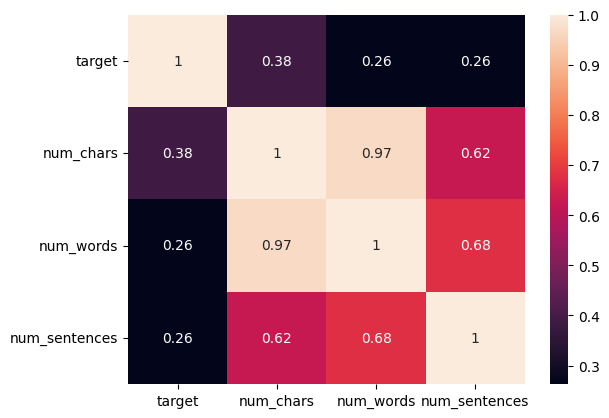

In [46]:
sns.heatmap(df[['target', 'num_chars', "num_words", 'num_sentences']].corr(), annot=True)
plt.show()


## Data Preprocessing:

- Lower case
- Tokenization
- Removing special characters
- Removing stop words and punctuation
- Stemming

In [56]:
# This is for Tokenization
from nltk.corpus import stopwords
nltk.download('stopwords')

# This is for stemming
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sayan\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [57]:
import re

# This is set containing all the stop words in English
stop_words = set(stopwords.words("english"))

# This is used for Stemming
ps = PorterStemmer()

def transform_text(text: str):
    # remove special characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # lowercase & tokenize
    tokens = nltk.word_tokenize(text.lower())

    # remove stopwords
    tokens = [word for word in tokens if word not in stop_words]

    # stemming
    tokens = [ps.stem(word) for word in tokens]

    return " ".join(tokens)   # return string

In [58]:
transform_text("Hello friends, I am Sayan!!! How are you all doing today?")

'hello friend sayan today'

In [59]:
df["transformed_text"] = df["text"].apply(transform_text)

In [60]:
df.head()

,target,text,num_chars,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri wkli comp win fa cup final tkt st m...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah dont think goe usf live around though
